# Effective Modeling Techniques: 92% Accuracy with Random Forest
<a id="start"></a>

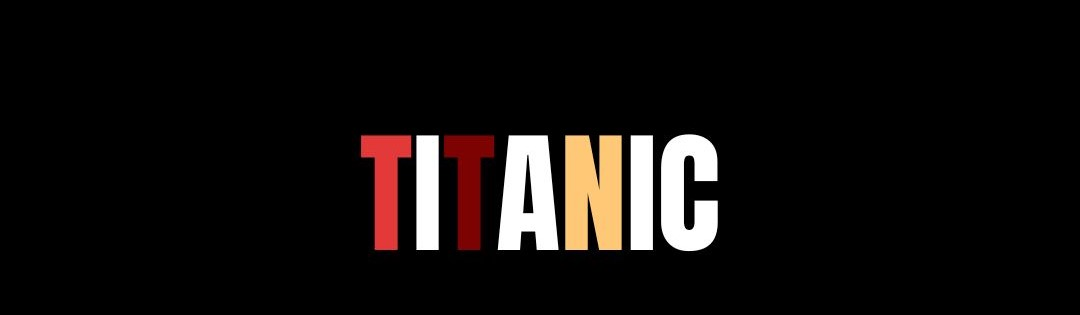

| Attribute | Details |
|-----------|---------|
| **Author** | **`Muhammad Bilal Khan`** |
| **Kaggle** | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/devbilalkhan) |
| **Twitter** | [![Twitter Badge](https://img.shields.io/badge/Twitter-%23000000.svg?style=for-the-badge&logo=Twitter&logoColor=white)](https://twitter.com/devbilalkhan) |
| **GitHub** | [![GitHub Badge](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/devbilalkhan) |
| **Email** | [![Outlook Badge](https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=for-the-badge&logo=microsoft-outlook&logoColor=white)](mailto:bilal.khan@live.com) |

## Project Goal

The goal of this project is to develop a machine learning model that can predict outcomes with high accuracy. Specifically, I aim to:

- Experiment with various machine learning algorithms and techniques to find the most effective approach for our dataset.
- Focus on optimizing a Random Forest model to achieve and exceed a target accuracy of 92%.
- Employ feature engineering to improve model performance, detailing the methods and transformations that contributed most to the predictive power of the model.
- Provide a clear and detailed account of the modeling process, from data preprocessing to final evaluation, ensuring the steps are replicable and understandable.
- By the end of this notebook, I intend to present a well-tuned Random Forest model backed by a robust set of features, delivering transparent insights into its success.


## Dataset Overview

The Titanic dataset is a classic and very famous dataset used for machine learning and data analysis. It contains information about the passengers, formatted into two sets: training and test data. The training set includes passenger information along with the survival outcome, which we'll use to train our machine learning models. The test set contains passenger information but without the survival outcome, and it's used to test the performance of our trained models.

Here are the key columns in the dataset along with a brief description of each:

- `Survived`: Indicates if a passenger survived (1) or not (0).
- `Pclass`: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name`: Passenger's name.
- `Sex`: Passenger's sex.
- `Age`: Passenger's age in years.
- `SibSp`: Number of siblings/spouses aboard the Titanic.
- `Parch`: Number of parents/children aboard the Titanic.
- `Ticket`: Ticket number.
- `Fare`: Passenger fare.
- `Cabin`: Cabin number.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


## Acknowledgements

I would like to acknowledge the creators of the Titanic dataset for making it publicly available and a special thanks to the Kaggle platform for hosting the Titanic Machine Learning competition. 

I would like to extend my gratitude to [Gabriel Preda](https://www.kaggle.com/gpreda) for his invaluable contributions to the analysis of the Titanic dataset. Gabriel's notebook has been a guiding resource, demonstrating the power of thoughtful data analysis.

[Navigate to Conclusion ➡️](#conclusion)

# 1. Abstract

This project focuses on building a machine learning model with high accuracy. I work on improving the Random Forest algorithm to reach 92% accuracy. I use the best hyperparameters and work carefully on selecting and changing features to make the model better.

I choose and change the features in the dataset to find the most important ones. I explain these steps clearly to help others understand how feature work helps the model.

In the end, I have a well-working Random Forest model. 


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_utils import inspect_missing_values,  display_custom_palette
import warnings
warnings.filterwarnings('ignore')


<h1 style="background-color: #583BE3; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif;">2. Data Inspection</h1>

In [3]:
train_ds = pd.read_csv('/kaggle/input/titanic/train.csv')
test_ds = pd.read_csv('/kaggle/input/titanic/test.csv')

For a comprehensive EDA analysis on these datasets, you can find my notebook here [Comprehensive EDA with Nice Graphs](https://www.kaggle.com/code/devbilalkhan/comprehensive-eda-with-nice-graphs). I will only focus on model training in this notebook. 

## 2.1. Train

In [4]:
train_ds.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C


## 2.2. Test

In [5]:
test_ds.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
361,1253,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S
227,1119,3,"McNeill, Miss. Bridget",female,NaN,0,0,370368,7.7500,NaN,Q
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S


In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2.3. Observation - Summary Information 
- The train dataset contains a total of **12 columns**, of which there are **7 numerical columns** (`PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`) and **5 categorical columns** (`Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`).

- The shape of the `train_ds` DataFrame is **891 rows** and **12 columns**, indicating that there are 891 entries, each with 12 attributes.

In [7]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Observation - Statistical Summary of Train dataset
- **`Survived`** is a binary indicator where **`1`** represents survival and **`0`** represents non-survival. The mean survival rate is **`0.383838`** (approximately **`38.38%`**), suggesting that less than half of the passengers survived.

- **`Pclass`** represents the class of travel with a lower number indicating a higher class. The passengers are spread across three classes, with a mean **`Pclass`** of **`2.308642`**, implying that most passengers are in the second and third classes.

- The **`Age`** of passengers has a mean of **`29.699118`** years, with the youngest being **`0.42`** years old (likely a few months old) and the oldest at **`80`** years. The age data appears to be incomplete, with **`714`** out of **`891`** entries having non-null values.

# 3. Mising Data Inspection

## 3.1. Missing Values - Train

In [8]:
missing_values_train = inspect_missing_values(train_ds)
missing_values_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Missing %,0.0,0.0,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22
Data type,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


## 3.2. Missing Values - Test

In [9]:
missing_values_test = inspect_missing_values(test_ds)
missing_values_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,1,327,0
Missing %,0.0,0.0,0.0,0.0,20.57,0.0,0.0,0.0,0.24,78.23,0.0
Data type,int64,int64,object,object,float64,int64,int64,object,float64,object,object


## 3.3. Observations
### Missing Data Insights for Train Dataset

- **Missing Entries**: In the training dataset of 891 entries, several columns have missing values:
  - `Age` has **177 missing entries (19.87%)**.
  - `Cabin` has **687 missing entries (77.1%)**.
  - `Embarked` has **2 missing entries (0.22%)**.
  
### Missing Data Insights for Test Dataset

- **Missing Entries**: In the training dataset of 418 entries, several columns have missing values:
  - `Age` has **86 missing entries (20.57%)**.
  - `Cabin` has **327 missing entries (78.23%)**.
  - `Fare` has **1 missing entries (0.24%)**.

<h1 style="background-color: #583BE3; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif;">Data Preprocessing</h1>

# 4. Data Cleaning

## 4.1. Handling Missing Values
As we know from our analysis above, the missing values are in the following features:
- Cabin
- Age
- Embarked

Let's deal with these now.
For missing values in Cabin, I will follow the technique used by [Niklas Donges](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8). As the article suggests, in `C123` the `C` refers to a deck on the titanic ship. Using this information, we will create a new feature called `'Deck' `that represents a deck of the cabin.

In [10]:
import re

# Define the deck level dictionary
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Create a list of datasets
data = [train_ds, test_ds]

for dataset in data:
    # Fill missing Cabin values with 'U0'
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    
    # Extract the first sequence of letters which represents the Deck and map it to a number
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    
    # Fill missing Deck values with 0
    dataset['Deck'] = dataset['Deck'].fillna(0)
    
    # Convert Deck to an integer type
    dataset['Deck'] = dataset['Deck'].astype(int)
    
    # Drop the Cabin column as it's no longer needed
    dataset.drop(['Cabin'], axis=1, inplace=True)

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

data = [train_ds, test_ds]
for dataset in data:
    dataset['Age'] = imputer.fit_transform(dataset['Age'].values.reshape(-1, 1))
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])  
    dataset['Fare'] = (dataset['Fare'].fillna(0)).astype(int)

## 4.2. Feature Extraction

### 4.1.1. New Feature for Sibling Spouse and Parent Child Relationship
I will combine the SibSp and Parch columns to create a new column called FamilySize. I will also create a new column called IsAlone to indicate if the passenger was alone or not.

In [12]:
data = [train_ds, test_ds]
for dataset in data:
  dataset['isAlone'] = (dataset['SibSp'] + dataset['Parch'] == 0).astype(int)
  dataset['isFamily'] = (dataset['SibSp'] + dataset['Parch'] > 0).astype(int)


### 4.1.2. Feature Engineering: Creating 'FamilySize' and 'Title' Features

In [13]:
data = [train_ds, test_ds]

for dataset in data:
    # Create the FamilySize feature by adding SibSp, Parch, and 1 - for the individual themselves
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    # Extract Title from the Name column
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Consolidate rare titles into a single 'Rare' category
    rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    dataset['Title'] = dataset['Title'].replace(rare_titles, 'Rare')
    
    # Replace 'Mlle' and 'Ms' with 'Miss', and 'Mme' with 'Mrs'
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

    # Extract An AgeGroup from the Age column
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 12, 18, 60, np.inf], labels=['Child', 'Teenager', 'Adult', 'Senior'])

    # Create a fare per person feature
    dataset['FarePerPerson'] = (dataset['Fare'] / dataset['FamilySize']).astype(int)

   

### 4.1.3. Dropping Name and Ticket Features

In [14]:
columns_to_drop = ['Name', 'Ticket']

data = [train_ds, test_ds]

for dataset in data:
    dataset.drop(columns=columns_to_drop, inplace=True)

In [15]:
inspect_missing_values(train_ds)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,isAlone,isFamily,FamilySize,Title,AgeGroup,FarePerPerson
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Missing %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data type,int64,int64,int64,object,float64,int64,int64,int64,object,int64,int64,int64,int64,object,category,int64


In [16]:
inspect_missing_values(test_ds)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,isAlone,isFamily,FamilySize,Title,AgeGroup,FarePerPerson
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Missing %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data type,int64,int64,object,float64,int64,int64,int64,object,int64,int64,int64,int64,object,category,int64


## 4.2. Categorical Features Mapping

In [17]:
def category_mapping(data):
  mapping = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2},
    'Title': {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5},
    'AgeGroup': {'Child': 1, 'Teenager': 2, 'Adult': 3, 'Senior': 4}   
  }

  # loop over each dataframe in the list
  for df in data:
    # map the categorical features to numerical values using the mapping dict
    for feature, value in mapping.items():
      df[feature] = df[feature].map(value)

  return data

data = category_mapping([train_ds, test_ds])

## 4.3. Normalization

In [18]:
from sklearn.preprocessing import StandardScaler

def normalize_data(data):
    scaler = StandardScaler()

    for i in range(len(data)):
        # apply scaling to the whole data and update the original dataframe
        data[i][:] = scaler.fit_transform(data[i])

    return data

data = normalize_data([train_ds, test_ds])

<h1 style="background-color: #583BE3; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif;">Model Selection and Training</h1>

# 5. Model Training

In [19]:
# split the train_ds into features and target
X = train_ds.drop(columns='Survived')
y = train_ds['Survived'].astype(int)

from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.1. Model Selection and Cross-Validation

In [20]:
# apply different classifier with kfold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# create a list of classifiers
classifiers = [RandomForestClassifier, DecisionTreeClassifier, SVC, LogisticRegression, KNeighborsClassifier, GaussianNB, XGBClassifier]

# create a list of classifiers names
classifiers_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'XGBClassifier']

# create a list of classifiers scores
classifiers_scores = []

# loop over each classifier and calculate the cross validation score
for classifier, name in zip(classifiers, classifiers_names):
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    model = classifier()
    cv_score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    classifiers_scores.append(cv_score.mean())

# create a dataframe of classifiers and their scores
classifiers_df = pd.DataFrame({'Classifier': classifiers_names, 'Score': classifiers_scores})
classifiers_df


,Classifier,Score
0,RandomForestClassifier,0.830487
1,DecisionTreeClassifier,0.762035
2,SVC,0.822672
3,LogisticRegression,0.810337
4,KNeighborsClassifier,0.806954
5,GaussianNB,0.766567
6,XGBClassifier,0.808040


## 5.2. Hyperparameter Tunning - Random Forest

In [21]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Setup the RandomizedSearchCV instance
random_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1)

# Fit the RandomizedSearchCV instance to the data
random_search.fit(X, y)

# Print the best parameters and the corresponding score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Retrieve the best estimator
best_rf = random_search.best_estimator_

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Best score: 0.8294051627384961


In [22]:
best_rf.score(X, y)

0.9158249158249159

### 5.2.1 Best Parameters

In [23]:
df_params = pd.DataFrame([best_rf.get_params()], index=["Params"]).T
df_params

,Params
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,10
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,2


### 5.2.2. Feature Importance

In [24]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
12,Title,0.208978
2,Sex,0.186368
6,Fare,0.090717
0,PassengerId,0.089501
3,Age,0.085116
14,FarePerPerson,0.082310
1,Pclass,0.064821
8,Deck,0.052145
11,FamilySize,0.046365
4,SibSp,0.024126


Custom Color Palette Display:


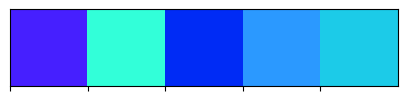

In [25]:
palette_colors = ["#461FFF", "#32FFD9", "#002BF5", "#2B99FF", "#1CCBE8"]
display_custom_palette(palette_colors)

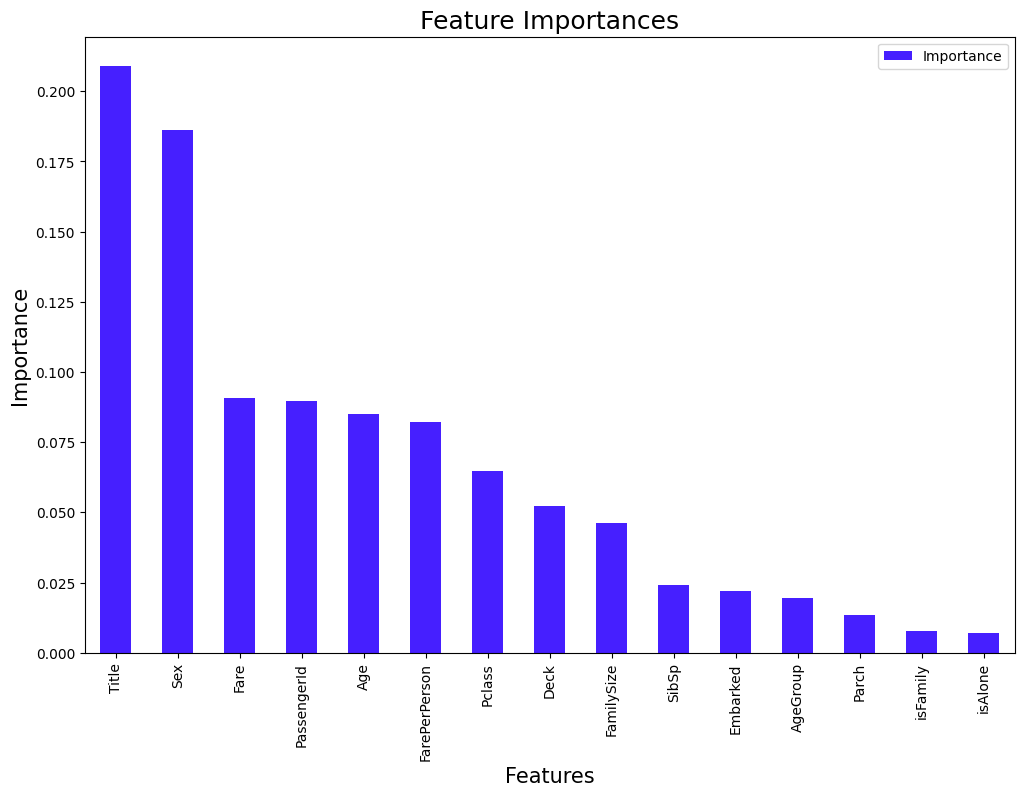

In [26]:
feature_importances.plot(kind='bar', x='Feature', y='Importance', color=palette_colors[0], figsize=(12, 8))
plt.title('Feature Importances', size=18)
plt.xlabel('Features', size=15)
plt.ylabel('Importance', size=15)
plt.show()

### 5.2.3 Results - Random Forest

In [27]:
# Evaluate the model on the test set and generate all classification metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)  # Renamed variable to avoid conflict

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)  # Renamed variable to avoid conflict

# Generate the accuracy score
accuracy = accuracy_score(y_test, y_pred)  # Renamed variable to avoid conflict

print(f"Classification Report:\n{report}\n")
print(f"Confusion Matrix:\n{matrix}\n")
print(f"Accuracy Score: {accuracy}\n")

# Make predictions on the test set (assuming test_ds is prepared correctly)
test_predictions = best_rf.predict(test_ds)
# Now you can use test_predictions for further analysis or export

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.92      0.89      0.90        74

    accuracy                           0.92       179
   macro avg       0.92      0.92      0.92       179
weighted avg       0.92      0.92      0.92       179


Confusion Matrix:
[[99  6]
 [ 8 66]]

Accuracy Score: 0.9217877094972067



### 5.2.4 Plot Confusion Matrix

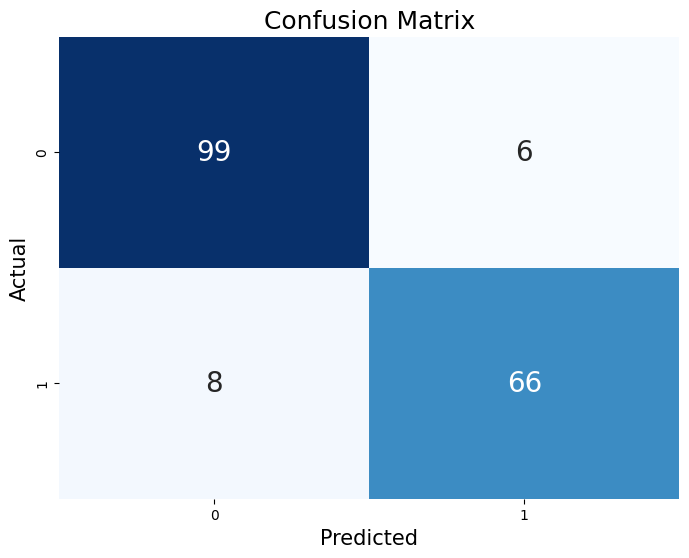

In [28]:
# Generate Confusion Matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 20})
plt.xlabel('Predicted', size=15)
plt.ylabel('Actual', size=15)
plt.title('Confusion Matrix', size=18)
plt.show()

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

scores_df = pd.DataFrame({
    'Model': ['RandomForest'],
    'Accuracy': [accuracy],
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}, index=["Metrics"])

scores_df.T


,Metrics
Model,RandomForest
Accuracy,0.921788
Precision,0.916667
Recall,0.891892
F1 Score,0.90411
